In [1]:
#!pip install tweepy

In [2]:
#!pip install textblob

In [3]:
#!pip install wordcloud

In [4]:
#!pip install pandas

In [5]:
#!pip install numpy

In [6]:
#!pip install matplotlip

In [7]:
import tweepy

In [8]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re


In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
# load the data
#from google.colab import files
#uploaded = files.upload()

In [11]:
#Got the data
log=pd.read_csv('login.csv')

In [12]:
#Twitter API credentials
consumerKey=log['api_key'][0]
consumerSecret=log['api_key_secret'][0]
accessToken=log['access_token'][0]
accessTokenSecret=log['access_token_secret'][0]

In [13]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey , consumerSecret)
# set the access token and access token secret
authenticate.set_access_token(accessToken , accessTokenSecret)
# create the API object while passing in the auth information
api = tweepy.API(authenticate,wait_on_rate_limit = True)

In [14]:

# Extract 100 tweets from the tweeter user
posts = api.user_timeline(screen_name = "BillGates", count=100,lang ="en",tweet_mode="extended")

#print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
count = 1
for tweets in posts[0:5]:
  print(str(count) + ')' + tweets.full_text + '\n')
  count = count+1

Show the 5 recent tweets: 

1)What if you could visit a museum exhibit about the last pandemic the world ever faced – COVID-19 – fifty years in the future? https://t.co/NDiPnkoKj4

2).@mgrace_andrews of @Project_Vesta is using the natural mineral olivine and oceans to remove a trillion tons of carbon dioxide from the atmosphere. #WorldOceansDay https://t.co/cGQaC9D6TC

3)No matter where I am, I always have a stack of books close by. Here are five that stuck with me. https://t.co/EAu9eN1lDA

4)These heroes are doing incredible work. https://t.co/lGSCMsI7gE

5)The innovators at @Ecocem have already reduced CO2 emissions in Europe by over 14 million tons. https://t.co/BbUB0svCOD



In [15]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 5 rows of data
df.head()

,Tweets
0,What if you could visit a museum exhibit about...
1,.@mgrace_andrews of @Project_Vesta is using th...
2,"No matter where I am, I always have a stack of..."
3,These heroes are doing incredible work. https:...
4,The innovators at @Ecocem have already reduced...


In [16]:
#Clean the text

#Create a function to clean the tweets
def cleanText(text):
  text = re.sub('@[A-Za-z0-9]+', '',text) #Remove @mention
  text = re.sub(r'@#', '', text) #Removing the '@#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removeing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link

  return text
  
#Cleaning the Text
df['Tweets']=df['Tweets'].apply(cleanText)

#Show the cleaned text
df


,Tweets
0,What if you could visit a museum exhibit about...
1,._andrews of _Vesta is using the natural miner...
2,"No matter where I am, I always have a stack of..."
3,These heroes are doing incredible work.
4,The innovators at have already reduced CO2 em...
...,...
95,Wild polio virus returning to Malawi reminds u...
96,Young people are right – it’s not too late to ...
97,"What a lovely bake, Ruby. You deserve a Paul H..."
98,I have enough nostalgia to go around. John Roa...


In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to got the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


,Tweets,Subjectivity,Polarity
0,What if you could visit a museum exhibit about...,0.095833,0.000000
1,._andrews of _Vesta is using the natural miner...,0.400000,0.100000
2,"No matter where I am, I always have a stack of...",0.000000,0.000000
3,These heroes are doing incredible work.,0.900000,0.900000
4,The innovators at have already reduced CO2 em...,0.000000,0.000000
...,...,...,...
95,Wild polio virus returning to Malawi reminds u...,0.596970,0.167424
96,Young people are right – it’s not too late to ...,0.511905,0.028571
97,"What a lovely bake, Ruby. You deserve a Paul H...",0.750000,0.625000
98,I have enough nostalgia to go around. John Roa...,0.575000,0.175000


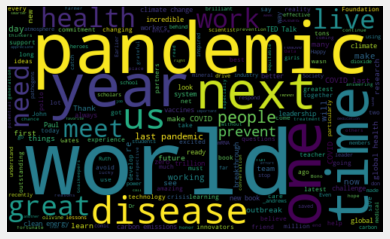

In [18]:
# Plot Word Cloud
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state= 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [19]:
#Create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,What if you could visit a museum exhibit about...,0.095833,0.000000,Neutral
1,._andrews of _Vesta is using the natural miner...,0.400000,0.100000,Positive
2,"No matter where I am, I always have a stack of...",0.000000,0.000000,Neutral
3,These heroes are doing incredible work.,0.900000,0.900000,Positive
4,The innovators at have already reduced CO2 em...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Wild polio virus returning to Malawi reminds u...,0.596970,0.167424,Positive
96,Young people are right – it’s not too late to ...,0.511905,0.028571,Positive
97,"What a lovely bake, Ruby. You deserve a Paul H...",0.750000,0.625000,Positive
98,I have enough nostalgia to go around. John Roa...,0.575000,0.175000,Positive


In [20]:
# Print all of the Positive Tweets
j=1
sorted_df = df.sort_values(by=['Polarity'])
for i in range(0,sorted_df.shape[0]):
  if(sorted_df['Analysis'][i] == 'Positive'):
    print(str(j) + ')'+sorted_df['Tweets'][i])
    print()
    j = j+1

1)._andrews of _Vesta is using the natural mineral olivine and oceans to remove a trillion tons of carbon dioxide from the atmosphere. #WorldOceansDay 

2)These heroes are doing incredible work. 

3)The brilliant team behind the @_Oceanbird_ could reduce carbon emissions in the sailing industry by up to 90% using clean wind power technology. 

4)As Head of Operations of _energy,  is working to harness the same energy source that powers the stars to create clean energy here on Earth. 

5)Meet some of the brilliant people behind the breakthroughs that could help the world get to net-zero carbon emissions.

6)Kim () was nominated for her outstanding research and her wider activism for global health. Just look at how much she’s accomplished so far. 

7)Cynthia () is an outstanding scientist, researcher, teacher, and leader. She supports hundreds of students through the African Society of Cambridge University and co-founded .

8)Reetika’s research explores gender violence and the climate cr

In [21]:
# Printing all the negative tweets
sortedDf=df.sort_values(by=['Polarity'])

count=1
for i in range(len(sortedDf)):
    if(sortedDf['Analysis'][i]=='Negative'):
        print(str(count)+') '+sortedDf['Tweets'][i]+'\n')
        count+=1

1) To avoid another COVID-19 – or worse – the world needs a full-time, paid team whose entire job is to prevent pandemics. I call it GERM: 

2) We can’t reach zero carbon emissions without innovation. In this new series, you’ll meet some people who are on the cutting edge of clean energy: 
#EarthDay 

3) Preventing the next pandemic is not cheap, but it'll save lives and money in the long run. The IMF estimates that COVID will cost nearly $14 trillion. We can save trillions by spending billions. 

4) Changing mindsets is never easy, but Sudha Varghese empowers girls to believe in themselves and see their potential for greatness:  



In [22]:
# Printing all the neutral tweets
sortedDf=df.sort_values(by=['Polarity'])

count=1
for i in range(len(sortedDf)):
    if(sortedDf['Analysis'][i]=='Neutral'):
        print(str(count)+') '+sortedDf['Tweets'][i]+'\n')
        count+=1

1) What if you could visit a museum exhibit about the last pandemic the world ever faced – COVID-19 – fifty years in the future? 

2) No matter where I am, I always have a stack of books close by. Here are five that stuck with me. 

3) The innovators at  have already reduced CO2 emissions in Europe by over 14 million tons. 

4) Geochemist _andrews of  is exploring how the mineral olivine can be spread across oceans to remove a trillion tons of carbon dioxide from the atmosphere. 

5) How it's going: 

6) How it started:  

7) . is working to detect pathogens earlier and stop pandemics in the their tracks. 

8) I’m answering your questions now on :  

9) Hey, , it’s been a while. Ask me anything at 10:30AM Pacific Time.

10) I hope the spirit of Paul Farmer’s work lives on for generations. 

11) I can't wait to read this. 

12) We will continue working with partners and do all we can to ensure none of us have to deal with a pandemic again.

13) I also had a chance to meet up with Gates 

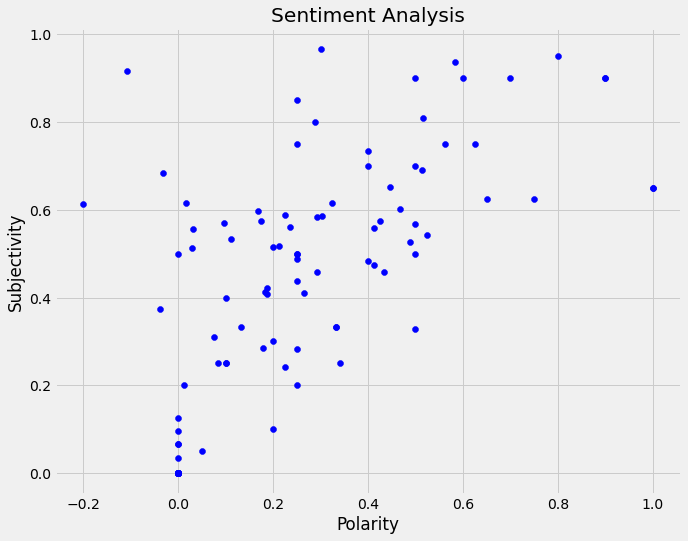

In [23]:
# Plot the polarity and subjectivity
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [24]:
# Get the Percentage of positive tweets
positive_tweets = df[df.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']
print(positive_tweets)

round( (positive_tweets.shape[0] / df.shape[0]) *100, 1)

1     ._andrews of _Vesta is using the natural miner...
3              These heroes are doing incredible work. 
5     The brilliant team behind the @_Oceanbird_ cou...
6     As Head of Operations of _energy,  is working ...
8     Meet some of the brilliant people behind the b...
                            ...                        
94    Bono is humanity’s rock star and I’m fortunate...
95    Wild polio virus returning to Malawi reminds u...
96    Young people are right – it’s not too late to ...
97    What a lovely bake, Ruby. You deserve a Paul H...
98    I have enough nostalgia to go around. John Roa...
Name: Tweets, Length: 74, dtype: object


74.0

In [25]:
# Get the Percentage of Negative tweets
Negative_tweets = df[df.Analysis == 'Negative']
Negative_tweets = Negative_tweets['Tweets']
print(Negative_tweets)

round( (Negative_tweets.shape[0] / df.shape[0]) *100, 1)

66    To avoid another COVID-19 – or worse – the wor...
76    We can’t reach zero carbon emissions without i...
82    Preventing the next pandemic is not cheap, but...
99    Changing mindsets is never easy, but Sudha Var...
Name: Tweets, dtype: object


4.0

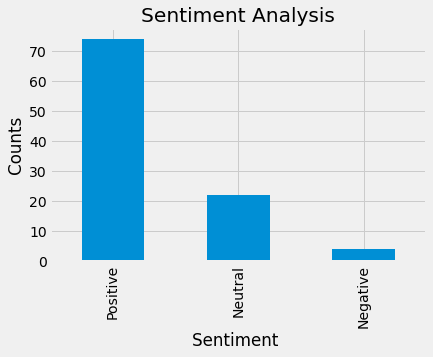

In [26]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment ')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()